In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [9]:
print(df.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)               48
CO2 Emissions (metric tons per capita)    31
Air Pollution Index                        0
Water Quality Index                        0
dtype: int64


In [5]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [6]:
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [13]:
df.to_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv", index=False)

In [7]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")

In [8]:
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [9]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [10]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                   119.770000   
1      Albania                    10.320000   
2      Algeria                    21.530000   
3      Andorra                    63.879264   
4       Angola                    24.041678   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.223479            56.620370   
1                                1.544550           247.210437   
2                                3.718223           251.318912   
3                                5.777148           157.165643   
4                                0.592743            11.851903   

   Water Quality Index  Life expectancy           GDP  \
0            47.993807        64.500000  1.910135e+10   
1            68.502771        78.500000  1.527808e+10   
2            89.303617        76.700000  1.699882e+11   
3            43.693042        72.279679  3.154058e+09   
4            70.492828        60.80

In [11]:
print(merged_data.isnull().sum())
print(merged_data.describe())

Country                                     0
PM2.5 Concentration (µg/m³)                48
CO2 Emissions (metric tons per capita)     31
Air Pollution Index                         0
Water Quality Index                         0
Life expectancy                             0
GDP                                         0
Out of pocket health expenditure            0
Gross tertiary education enrollment (%)     0
Population                                  0
Urban_population                            0
dtype: int64
       PM2.5 Concentration (µg/m³)  CO2 Emissions (metric tons per capita)  \
count                   146.000000                              163.000000   
mean                     39.810827                                3.754936   
std                      27.973661                                4.606299   
min                       4.000000                                0.039935   
25%                      15.587500                                0.632643   
50%          

In [12]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  194 non-null    object 
 1   PM2.5 Concentration (µg/m³)              146 non-null    float64
 2   CO2 Emissions (metric tons per capita)   163 non-null    float64
 3   Air Pollution Index                      194 non-null    float64
 4   Water Quality Index                      194 non-null    float64
 5   Life expectancy                          194 non-null    float64
 6   GDP                                      194 non-null    float64
 7   Out of pocket health expenditure         194 non-null    float64
 8   Gross tertiary education enrollment (%)  194 non-null    float64
 9   Population                               194 non-null    float64
 10  Urban_population                         194 non-n

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


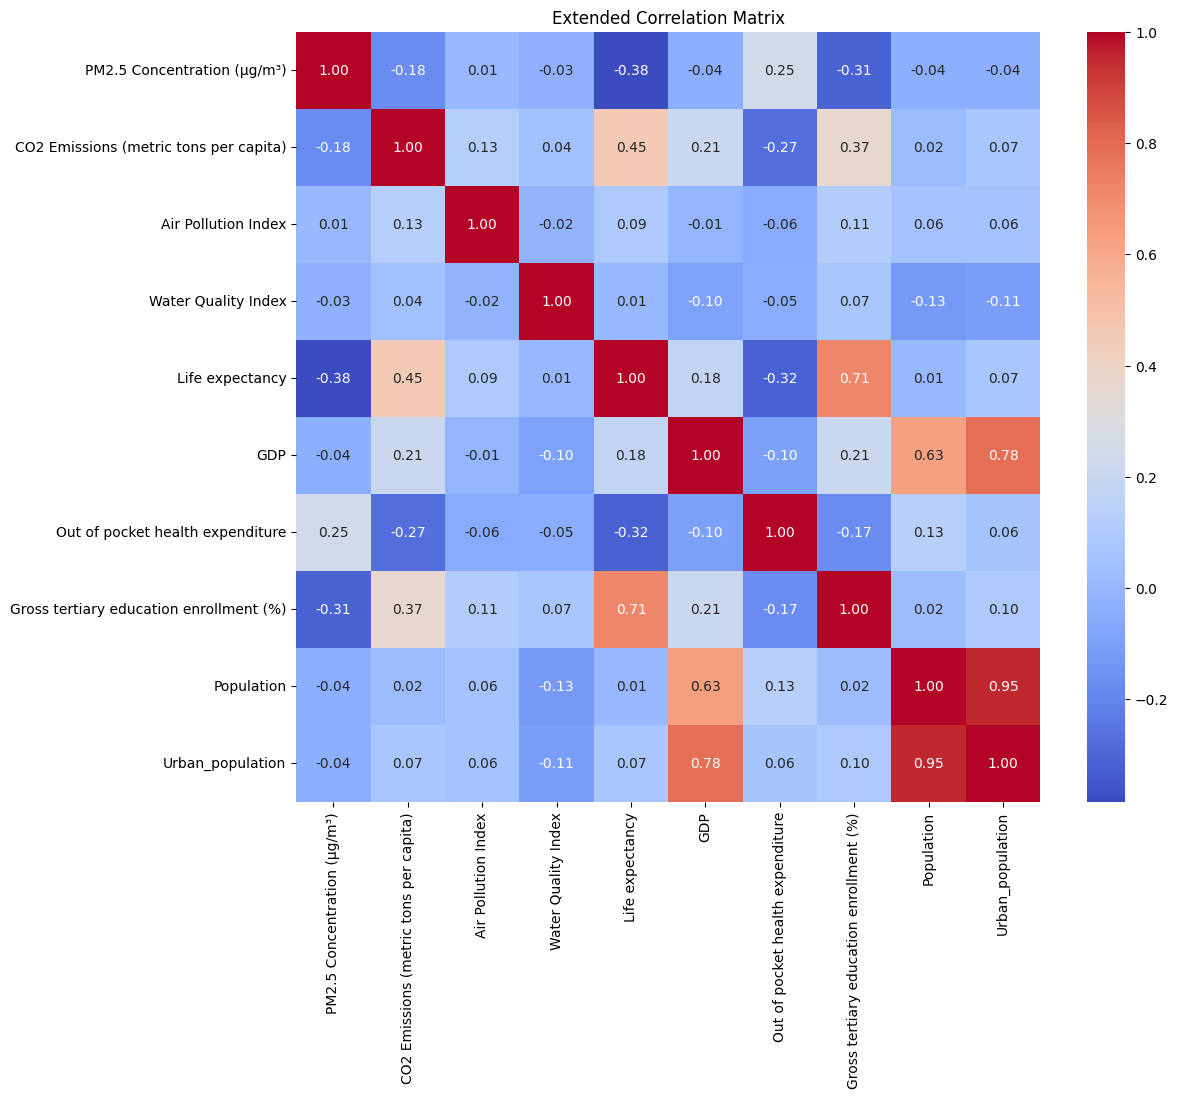

In [13]:
numeric_data = merged_data.select_dtypes(include=[np.number])  
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()

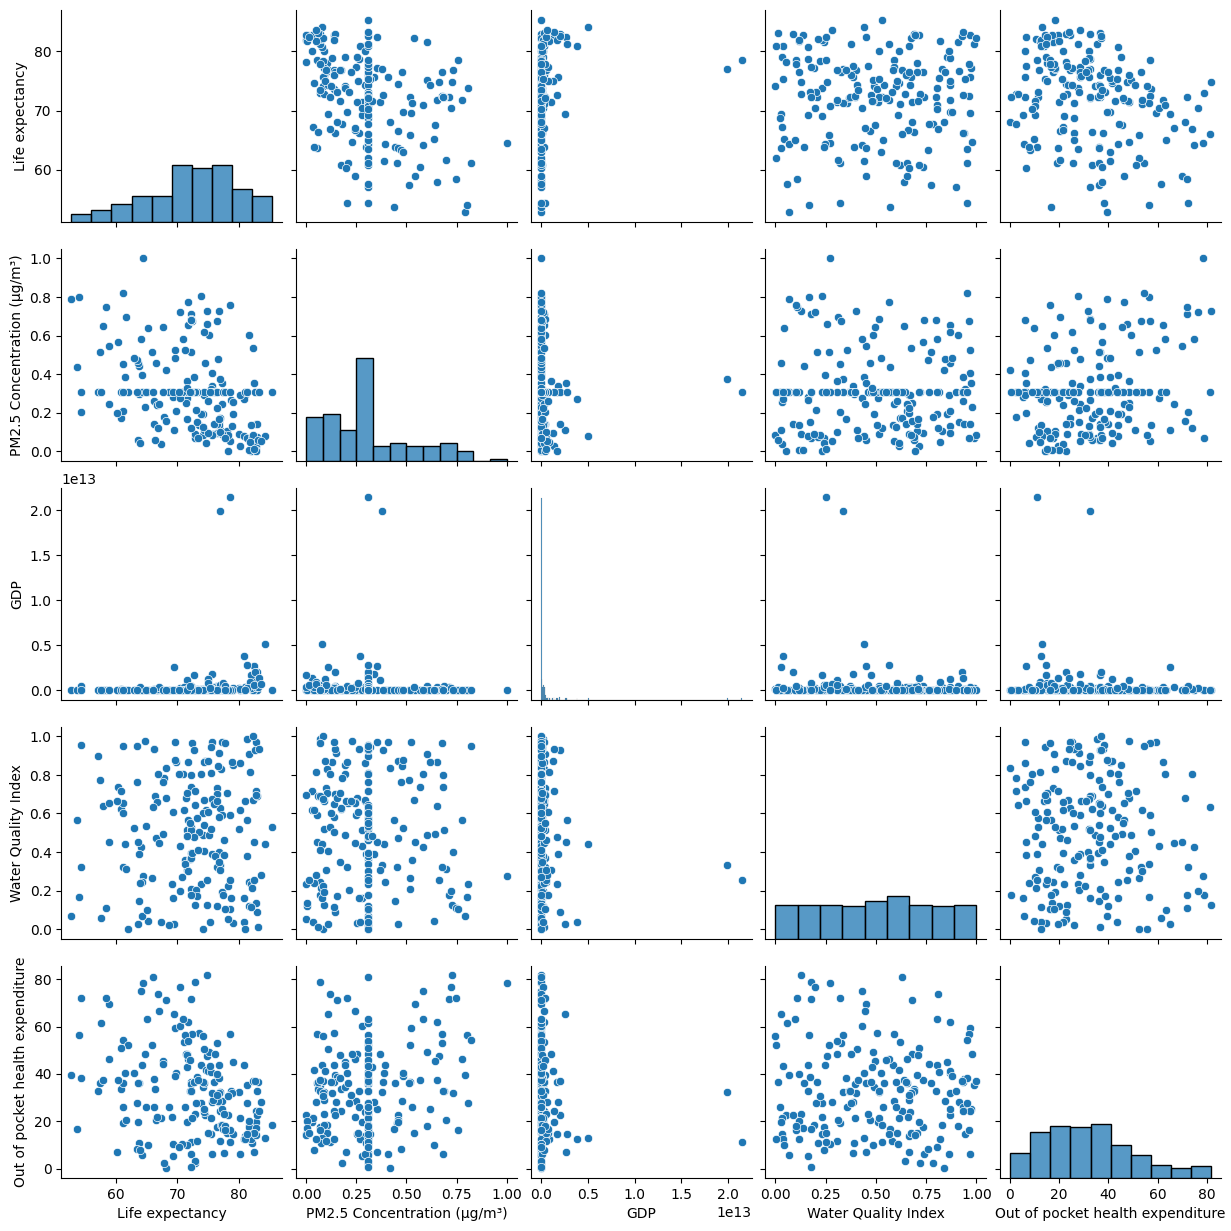

In [14]:
sns.pairplot(merged_data[['Life expectancy', 'PM2.5 Concentration (µg/m³)', 'GDP', 'Water Quality Index', 'Out of pocket health expenditure']])
plt.show()

In [21]:
X = merged_data.drop(['Country', 'Life expectancy'], axis=1)
y = merged_data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

rf_initial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_initial.fit(X_train, y_train)
feature_importances = pd.Series(rf_initial.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Gross tertiary education enrollment (%)    0.538934
CO2 Emissions (metric tons per capita)     0.185297
Out of pocket health expenditure           0.055520
Population                                 0.052654
GDP                                        0.042468
PM2.5 Concentration (µg/m³)                0.040869
Urban_population                           0.034420
Air Pollution Index                        0.025304
Water Quality Index                        0.024533
dtype: float64


In [22]:
top_features = [
    'Gross tertiary education enrollment (%)',  
    'CO2 Emissions (metric tons per capita)',  
    'Out of pocket health expenditure',
    'Population',
    'GDP',
    'PM2.5 Concentration (µg/m³)',
    'Urban_population'
]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_rmse = []
fold_mae = []
fold_r2 = []

for train_index, valid_index in kf.split(X_train_top):
    X_train_fold, X_valid_fold = X_train_top.iloc[train_index], X_train_top.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    # Train the model using RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_fold, y_train_fold)

    y_pred_valid = model.predict(X_valid_fold)

    rmse = np.sqrt(mean_squared_error(y_valid_fold, y_pred_valid))
    mae = mean_absolute_error(y_valid_fold, y_pred_valid)
    r2 = r2_score(y_valid_fold, y_pred_valid)

    fold_rmse.append(rmse)
    fold_mae.append(mae)
    fold_r2.append(r2)

print("RMSE for each fold:", fold_rmse)
print("Mean RMSE across all folds:", np.mean(fold_rmse))
print("Standard Deviation of RMSE across folds:", np.std(fold_rmse))

print("MAE for each fold:", fold_mae)
print("Mean MAE across all folds:", np.mean(fold_mae))
print("Standard Deviation of MAE across folds:", np.std(fold_mae))

print("R2 for each fold:", fold_r2)
print("Mean R2 across all folds:", np.mean(fold_r2))
print("Standard Deviation of R2 across folds:", np.std(fold_r2))

RMSE for each fold: [5.65069800046063, 4.725771619118031, 4.668626955965247, 3.7692779651525075, 4.742749147068114]
Mean RMSE across all folds: 4.711424737552906
Standard Deviation of RMSE across folds: 0.5954651131525264
MAE for each fold: [4.533207176125582, 3.5307184750733205, 3.688464205623587, 2.724339830947051, 3.7257239951699184]
Mean MAE across all folds: 3.6404907365878914
Standard Deviation of MAE across folds: 0.5758283137924421
R2 for each fold: [0.5815172328569373, 0.4628340304781604, 0.6640649154437911, 0.6820351631370143, 0.5165493599186779]
Mean R2 across all folds: 0.5814001403669162
Standard Deviation of R2 across folds: 0.08393382237929811


In [23]:
# Hyperparameter tuning with GridSearchCV using K-Fold Cross-Validation on the selected features
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_top, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
best_model = grid_search.best_estimator_
X_test_top_features = X_test[top_features]
y_pred_test = best_model.predict(X_test_top_features)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R2 Score: {r2_test}")

Test RMSE: 3.2724523201115296
Test MAE: 2.7548558789527777
Test R2 Score: 0.7586059526925589


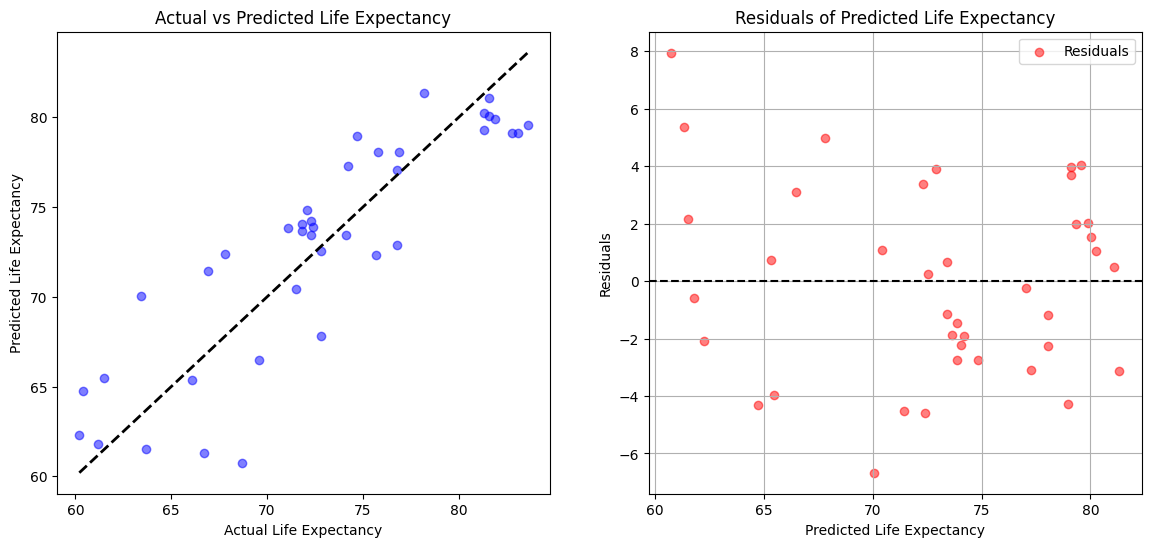

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')

residuals = y_test - y_pred_test

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals, color='red', alpha=0.5, label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

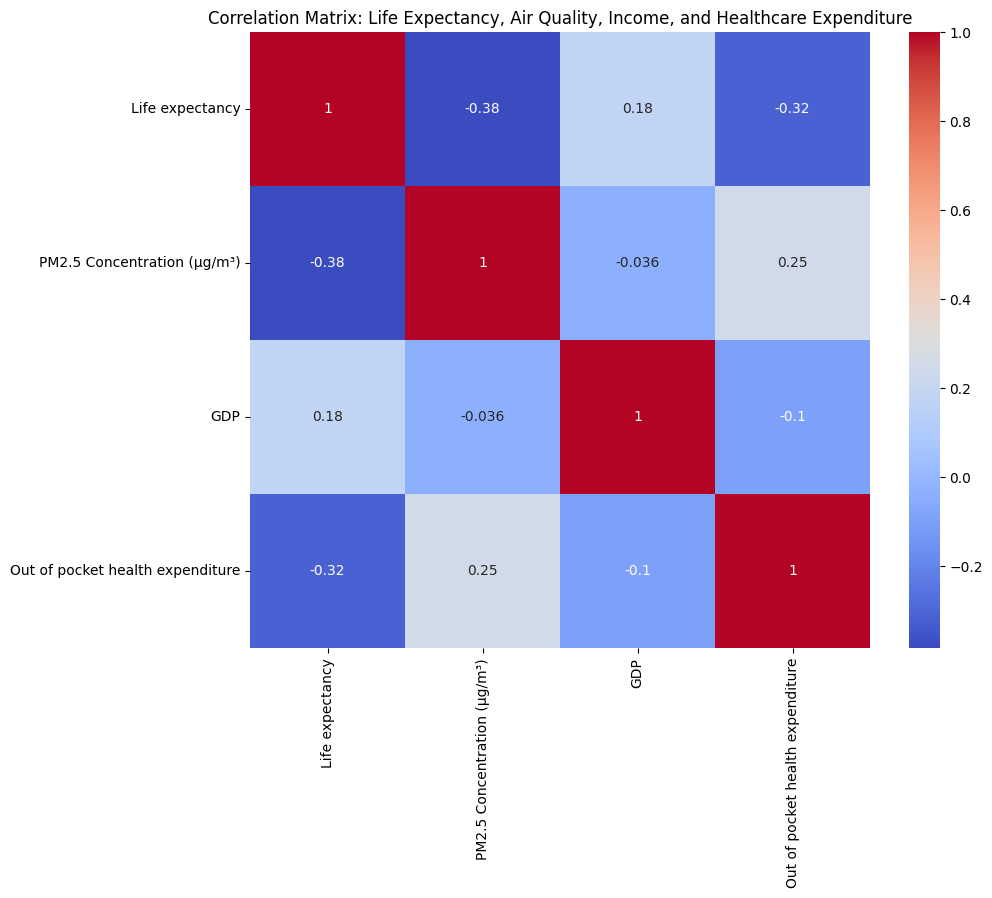

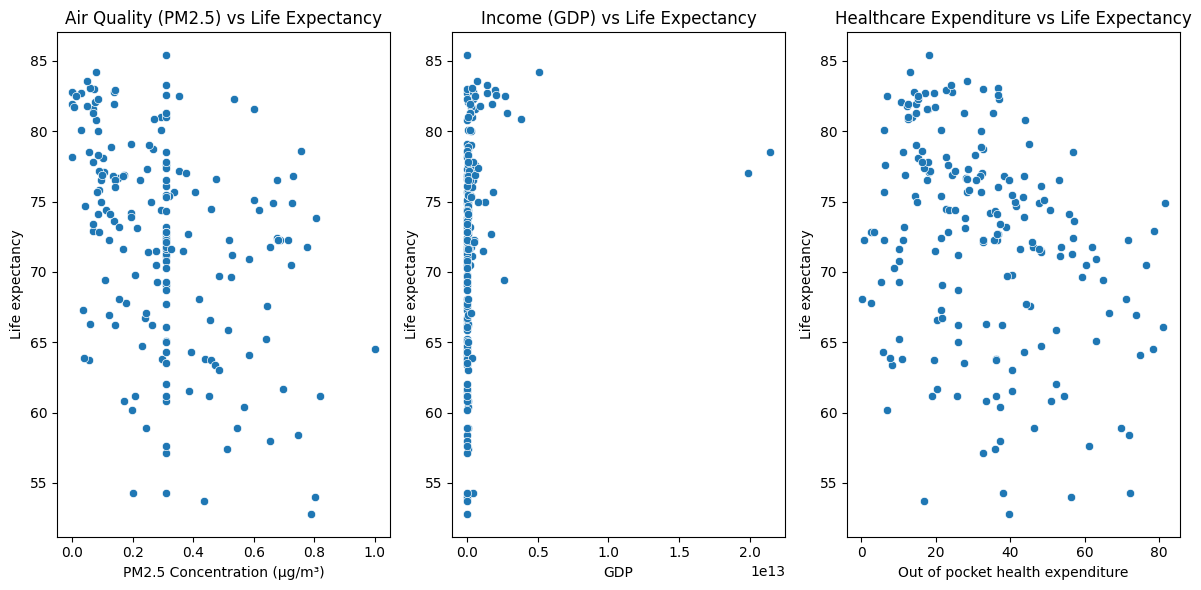

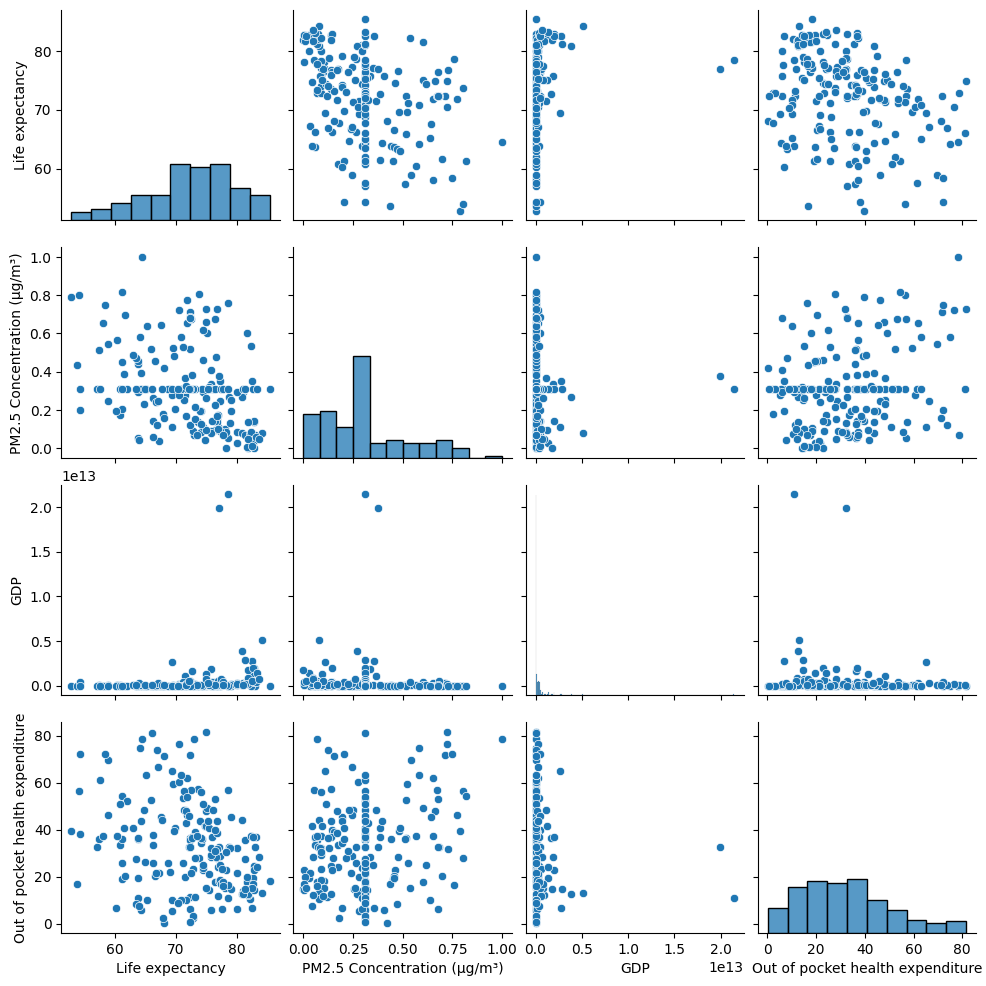

In [28]:
plt.figure(figsize=(10, 8))
corr_matrix = merged_data[['Life expectancy', 'PM2.5 Concentration (µg/m³)', 'GDP', 'Out of pocket health expenditure']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Life Expectancy, Air Quality, Income, and Healthcare Expenditure')
plt.show()

plt.figure(figsize=(12, 6))

# Scatter plot of Air Quality vs Life Expectancy
plt.subplot(1, 3, 1)
sns.scatterplot(x='PM2.5 Concentration (µg/m³)', y='Life expectancy', data=merged_data)
plt.title('Air Quality (PM2.5) vs Life Expectancy')

# Scatter plot of GDP vs Life Expectancy
plt.subplot(1, 3, 2)
sns.scatterplot(x='GDP', y='Life expectancy', data=merged_data)
plt.title('Income (GDP) vs Life Expectancy')

# Scatter plot of Healthcare Expenditure vs Life Expectancy
plt.subplot(1, 3, 3)
sns.scatterplot(x='Out of pocket health expenditure', y='Life expectancy', data=merged_data)
plt.title('Healthcare Expenditure vs Life Expectancy')

plt.tight_layout()
plt.show()

sns.pairplot(merged_data[['Life expectancy', 'PM2.5 Concentration (µg/m³)', 'GDP', 'Out of pocket health expenditure']])
plt.show()